In [1]:
import numpy             as np
import matplotlib.pyplot as plt
from   scipy.stats       import norm
from   sys               import stdout

In [2]:
N   = 100000
m   = 1
s   = 0.2

x   = np.random.normal(loc=m, scale=s, size=N)
ex  = np.full(shape=N, fill_value=s)
p   = norm.pdf(x, loc=m, scale=s)
lnp = np.log(p)

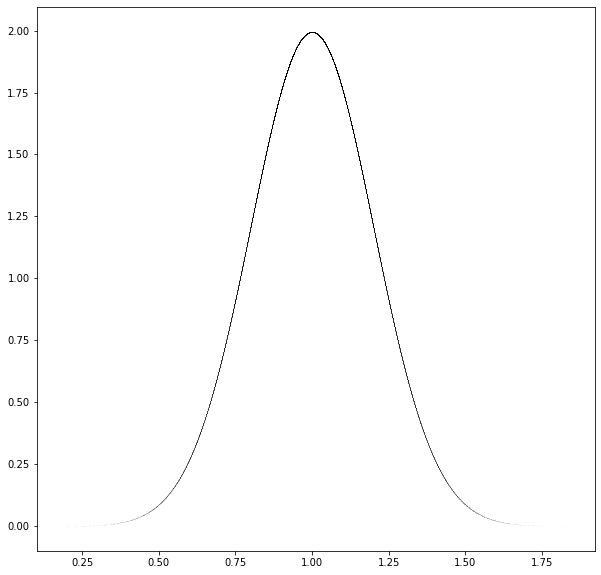

In [3]:
fig , ax = plt.subplots(figsize=(10,10))

ax.plot( x, p, ls='', c='black', marker='o', markersize=1e-2)

In [4]:
L   = np.prod(p)
lnL = np.sum(lnp)

print('Likelihood    = {:.2e}'.format(L))
print('LogLikelihood = {:.2e}'.format(lnL))

p_max = np.amax(p)
x_max = x[ np.argmax(p) ]

print()

print('p_i max = {:.2e} at x_i = {:.2f}'.format(p_max, x_max) )

print()

MLE  = np.mean(x)
EMLE = np.std(x) / np.sqrt(N)

print('MLE = {:.4f} +- {:.4f}'.format(MLE, EMLE))

Likelihood    = inf
LogLikelihood = 1.90e+04

p_i max = 1.99e+00 at x_i = 1.00

MLE = 0.9994 +- 0.0006


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [5]:
'''
def logL(X, m, s):
    p = np.zeros(len(X))
    for i in range(len(X)):
        p[i]   = norm.pdf(X[i], loc=m, scale=s)
    lnp = np.log(p)
    return np.sum(lnp)

LNL = np.zeros(1000)
for i, maa in enumerate(m_maybe):
    LNL[i] = logL(x, maa, s)
'''

m_maybe = np.linspace(start=0, stop=1, num=1000)

LNL = []

for i, m_i in enumerate(m_maybe):
    p_i   = norm.pdf(x, loc=m_i, scale=s)
    lnp_i = np.log(p_i)
    LNL.append(lnp_i)
    stdout.write('\r Progress = {:.3f}%'.format((i+1)/len(m_maybe)*100.)) # Dynamic print

LNL = np.array(LNL)

print()
print(len(LNL))
print(len(m_maybe))

 Progress = 100.000%
1000
1000


In [ ]:
plt.clf()

print(np.amax(LNL))
print(np.amin(LNL))
print(np.amax(m_maybe))
print(np.amin(m_maybe))

fig , ax = plt.subplots()

ax.set_xlim(0,1)
ax.set_ylim(-50,+50)

ax.plot( m_maybe, LNL) #, ls='', c='black', marker='o') #, markersize=1e-2)

0.6904993792294267
-41.597724047280785
1.0
0.0


In [ ]:
'''
def logL(X, m, s):
    p = np.zeros(len(X))
    for i in range(len(X)):
        p[i]   = norm.pdf(X[i], loc=m, scale=s)
    lnp = np.log(p)
    return np.sum(lnp)

LNL = np.zeros(1000)
for i, maa in enumerate(m_maybe):
    LNL[i] = logL(x, maa, s)


m_maybe = np.linspace(start=0, stop=1, num=1000)

LNL = np.zeros(1000)

for i in range(len(m_maybe)):
    lnp_i = 0
    for j in range(len(x)):
        p_j   = norm.pdf( x[j], loc=m_maybe[i], scale=s)
        lnp_i += np.log(p_j)
    LNL[i] = lnp_i
    stdout.write('\r Progress = {:.3f}%'.format(i/len(m_maybe)*100.)) # Dynamic print

fig , ax = plt.subplots(figsize=(10,10))

ax.plot( m_maybe, LNL, ls='', c='black', marker='o', markersize=1e-2)

'''